<a href="https://colab.research.google.com/github/CaiqueBorges/MC_alunos_ufrn/blob/main/Cats_dogs_noRaces_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. OBTER DATASET

In [1]:
!apt-get install subversion
!svn export https://github.com/CaiqueBorges/Projeto_cats-dogs/trunk/images_cats-dogs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 19 not upgraded.
Need to get 2,672 kB of archives.
After this operation, 10.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libapr1 amd64 1.7.0-8ubuntu0.22.04.1 [108 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libaprutil1 amd64 1.6.1-5ubuntu4.22.04.2 [92.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libserf-1-1 amd64 1.3.9-10ubuntu2 [50.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libutf8proc2 amd64 2.7.0-3 [73.9 kB]
Get:5 http://archive.

In [2]:
## Importando as libs necessárias
from google.colab import files
import os, io, time

pasta_alvo = 'images_cats-dogs'

# Lista para armazenar os nomes dos arquivos
uploaded_images = []

# Verifica se a pasta existe
if os.path.exists(pasta_alvo) and os.path.isdir(pasta_alvo):
  # Percorre a pasta e obtém os nomes dos arquivos
  for nome_arquivo in os.listdir(pasta_alvo):
    uploaded_images.append(nome_arquivo)
else:
  print(f"A pasta {pasta_alvo} não existe.")

# 2 HOG COM PCA


## 2.1 Aplicando HOG e PCA

In [3]:
## Reduzir as imagens
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
## pandas
import pandas as pd
## Importando PCA do SkLearn
from sklearn.decomposition import PCA

def classify_animal(value):
  if value in ['Abyssinian', 'Persian']:
    return 'cat'
  else:
    return 'dog'

hogs = [16,20,24]
pcas = [.50,.75,.95,1]


hogs_pcas = []

def hog_f(hog_size):
  hog_features = []
  #for filename in uploaded_images.keys():
  for filename in uploaded_images:
    image = imread('images_cats-dogs/'+ filename)
    image_resized = resize(image, (128,128))
    fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(hog_size, hog_size),
                      cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    hog_features.append(fd)

  ## Adicionar as colunas com os valores do hog para cada um
  #data = {"pathfile": uploaded_images.keys(), "hog_features": hog_features}
  data = {"pathfile": uploaded_images, "hog_features": hog_features}
  df = pd.DataFrame(data)
  df['classe'] = df['pathfile'].str.split('_').str[0].apply(classify_animal)
  df = df.drop('pathfile', axis=1)

  # transformando cada valor do hog_feature em um atributo (coluna)
  df2 = pd.DataFrame(df['hog_features'].tolist())
  df2.columns = df2.columns.map(lambda x: f'hog_feature_{x+1}')
  df = pd.concat([df.drop('hog_features', axis=1), df2], axis=1)
  return df

for hog_size in hogs:
  df = hog_f(hog_size)
  df.to_csv(f'HOG {hog_size}x{hog_size}.csv', index=False)
  hogs_pcas.append([hog_size, 0, df])
  print(f'hog de {hog_size}x{hog_size}')
  print(f'shape: {df.shape}')
  print()

  # ----- COMEÇANDO PCA ------
  for porcent in pcas:
    y = df.classe # Target variable (classe)
    X = df.copy().drop('classe', axis=1) # Features

    ##pca_obj = PCA(n_components=4) #para dizer quantos componentes quero ter
    pca_obj = PCA(n_components=porcent, whiten=True) #qual porcentagem de informação eu quero
    pca_result = pca_obj.fit_transform(X)

    print(f'hog de {hog_size}x{hog_size} e pca de {porcent}')
    print(f'shape: {pca_result.shape}')
    print()

    colunas = []
    for i in range(pca_result.shape[1]):
      colunas.append('pca_'+str(i))

    pca_dataset = pd.DataFrame(data = pca_result, columns = colunas) # Atual

    ## Juntando o atributo classe
    final_data = pca_dataset.join(y)

    # Salvando Pessoa.csv transformado
    df_hog_pca = pd.DataFrame(final_data)
    df_hog_pca.to_csv(f'HOG {hog_size}x{hog_size}_pca-{porcent}.csv', index=False)

    # Importando arquivo transformado
    #from google.colab import files
    #files.download(f'HOG {hog_size}x{hog_size}_pca-{porcent}.csv')
    hogs_pcas.append([hog_size, porcent, df_hog_pca])



hog de 16x16
shape: (800, 1765)

hog de 16x16 e pca de 0.5
shape: (800, 39)

hog de 16x16 e pca de 0.75
shape: (800, 111)

hog de 16x16 e pca de 0.95
shape: (800, 313)

hog de 16x16 e pca de 1
shape: (800, 1)

hog de 20x20
shape: (800, 901)

hog de 20x20 e pca de 0.5
shape: (800, 25)

hog de 20x20 e pca de 0.75
shape: (800, 69)

hog de 20x20 e pca de 0.95
shape: (800, 200)

hog de 20x20 e pca de 1
shape: (800, 1)

hog de 24x24
shape: (800, 577)

hog de 24x24 e pca de 0.5
shape: (800, 19)

hog de 24x24 e pca de 0.75
shape: (800, 49)

hog de 24x24 e pca de 0.95
shape: (800, 143)

hog de 24x24 e pca de 1
shape: (800, 1)



## 2.2 Treinamento em MLP


In [4]:
#numpy
from numpy import mean, std
# seaborn
import seaborn as sns
## Carregando o algoritmo / método / técnica Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
## Implementando k-fold CV
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, cross_val_score, cross_val_predict

all_accuracies = [['max_depth', 'base', 'treinamento/teste', 'accuracy']]
max_accuracy = [0,0,0,0,'','']

def treinamento(algoritmo, all_accuracies, max_accuracy):
  # Lista para armazenar todas as acurácias

  '''for n_splits in [10]:
    print(f'n_splits: {n_splits}')
    kf = KFold(n_splits=n_splits, random_state=73, shuffle=True)
    scores = cross_val_score(algoritmo, X, y, scoring='accuracy', cv=kf)
    accuracy = mean(scores)
    y_pred = cross_val_predict(algoritmo, X, y, cv=kf)
    if accuracy > max_accuracy[3]:
      if porcent == 0: #para quando não tiver aplicado o PCA
        max_accuracy = [max_depth, f'HOG ({hog_size}x{hog_size})', f'cv_n_splits_{n_splits}', round(accuracy,3), y, y_pred]
      else:
        max_accuracy = [max_depth, f'HOG ({hog_size}x{hog_size}) e PCA de {porcent}', f'cv_n_splits_{n_splits}', round(accuracy,3), y, y_pred]
    if porcent == 0: #para quando não tiver aplicado o PCA
      all_accuracies.append([max_depth, f'HOG ({hog_size}x{hog_size})', f'cv_n_splits_{n_splits}' , round(accuracy,3)])
    else:
      all_accuracies.append([max_depth, f'HOG ({hog_size}x{hog_size}) e PCA de {porcent}', f'cv_n_splits_{n_splits}' , round(accuracy,3)])
'''
  for size in [10,20,30]:
    print(f'divisão {100-size}/{size}')
    test_size = size/100 #0.10, 0.20 e 0.30
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=73)

    # Create KNeighborsClassifier object
    #knn = KNeighborsClassifier(max_depth=max_depth, metric='euclidean')

    algoritmo.fit(X_train, y_train)

    # Predict the response for the test dataset
    y_pred = algoritmo.predict(X_test)

    # Model Accuracy
    acuracia = metrics.accuracy_score(y_test, y_pred)

    if acuracia > max_accuracy[3]:
      if porcent == 0: #para quando não tiver aplicado o PCA
        max_accuracy = [max_depth, f'HOG ({hog_size}x{hog_size})', f'{100-size}/{size}', round(acuracia,3), y_test, y_pred]
      max_accuracy = [max_depth, f'HOG ({hog_size}x{hog_size}) e PCA de {porcent}', f'{100-size}/{size}', round(acuracia,3), y_test, y_pred]
    if porcent == 0: #para quando não tiver aplicado o PCA
      all_accuracies.append([max_depth, f'HOG ({hog_size}x{hog_size})', f'{100-size}/{size}' , round(acuracia,3)])
    all_accuracies.append([max_depth, f'HOG ({hog_size}x{hog_size}) e PCA de {porcent}', f'{100-size}/{size}' , round(acuracia,3)])
  return all_accuracies, max_accuracy


### 2.2.1 Variando as funções de ativação

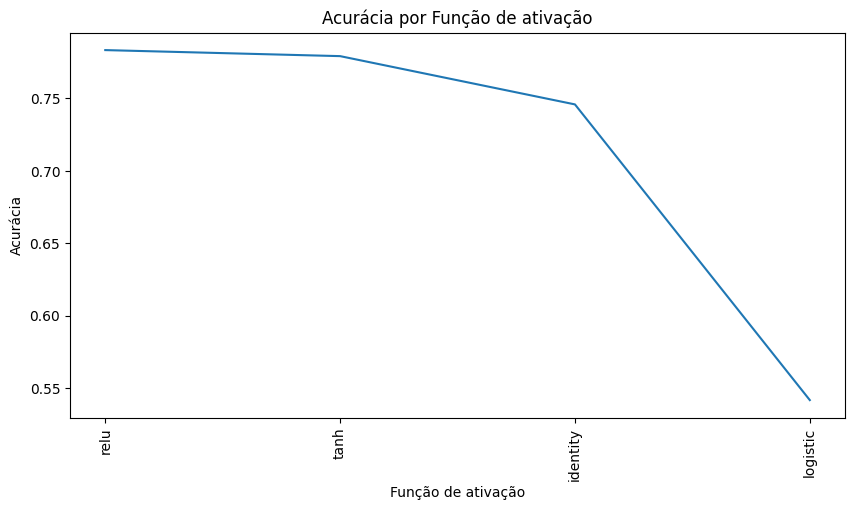

A função de ativação com a melhor acurácia é relu com uma acurácia de 0.7833333333333333


In [ ]:
import matplotlib.pyplot as plt
df = hogs_pcas[0][2].copy() #pegando o primeiro dataframe para fazer o teste

y = df.classe  # Target variable
X = df.drop('classe', axis=1)  # Features

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=73)

from sklearn.neural_network import MLPClassifier

resultados = []
lista_camadas = [(900)]
funcoes_ativacao = ['identity','logistic','tanh','relu']
algoritimos = ['adam']
taxas = [0.01]
for camadas in lista_camadas:
  for solver in algoritimos:
    for activation in funcoes_ativacao:
      for taxa in taxas:
        mlp = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=camadas,
                            random_state=73, learning_rate_init=taxa, learning_rate='adaptive', max_iter=500)
        mlp.fit(X_train, y_train)

        # Predict the response for the test dataset
        y_pred = mlp.predict(X_test)
        acuracia = metrics.accuracy_score(y_test, y_pred)
        resultados.append((activation, acuracia))

# Ordena os resultados pela acurácia
resultados.sort(key=lambda x: x[1], reverse=True)

# Plota os resultados
activation = [str(r[0]) for r in resultados]
acuracias = [r[1] for r in resultados]

plt.figure(figsize=(10,5))
plt.plot(activation, acuracias)
plt.xlabel('Função de ativação')
plt.ylabel('Acurácia')
plt.title('Acurácia por Função de ativação')
plt.xticks(rotation=90)
plt.show()

# Imprime o número de neurônios com a melhor acurácia
print(f'A função de ativação com a melhor acurácia é {resultados[0][0]} com uma acurácia de {resultados[0][1]}')

### 2.3.2 Variando o número de Neurônios

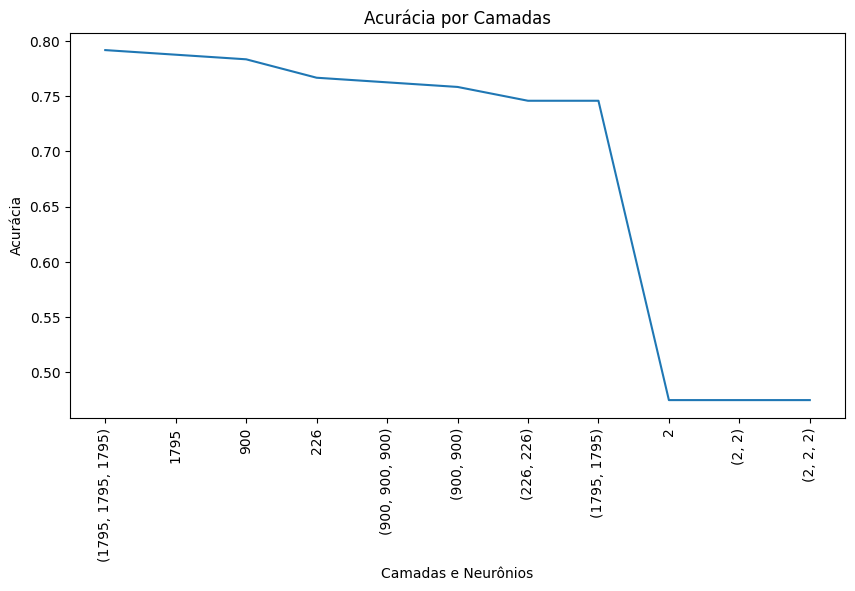

As camadas com a melhor acurácia é (1795, 1795, 1795) com uma acurácia de 0.7916666666666666


In [ ]:
import matplotlib.pyplot as plt
df = hogs_pcas[0][2].copy() #pegando o primeiro dataframe para fazer o teste

y = df.classe  # Target variable
X = df.drop('classe', axis=1)  # Features

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=73)

from sklearn.neural_network import MLPClassifier

funcoes_ativacao = [resultados[0][0]]
resultados = []
lista_camadas = [(2), (2,2), (2,2,2),
                 (226), (226,226), (226),
                 (900), (900,900), (900,900,900),
                 (1795), (1795,1795), (1795,1795,1795)]
algoritimos = ['adam']
taxas = [0.01]
for camadas in lista_camadas:
  for solver in algoritimos:
    for activation in funcoes_ativacao:
      for taxa in taxas:
        mlp = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=camadas,
                            random_state=73, learning_rate_init=taxa, learning_rate='adaptive', max_iter=500)
        mlp.fit(X_train, y_train)

        # Predict the response for the test dataset
        y_pred = mlp.predict(X_test)
        acuracia = metrics.accuracy_score(y_test, y_pred)
        resultados.append((camadas, acuracia))

# Ordena os resultados pelas camadas
resultados.sort(key=lambda x: x[1], reverse=True)

# Plota os resultados
camadas = [str(r[0]) for r in resultados]
acuracias = [r[1] for r in resultados]

plt.figure(figsize=(10,5))
plt.plot(camadas, acuracias)
plt.xlabel('Camadas e Neurônios')
plt.ylabel('Acurácia')
plt.title('Acurácia por Camadas')
plt.xticks(rotation=90)
plt.show()

# Imprime o número de neurônios com a melhor acurácia
print(f'As camadas com a melhor acurácia é {resultados[0][0]} com uma acurácia de {resultados[0][1]}')

Mudando a base de dados como teste

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


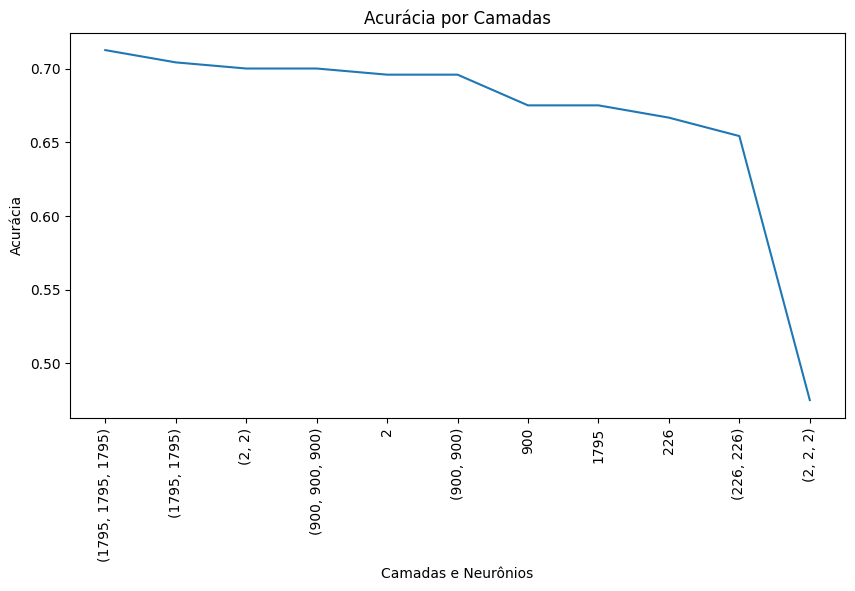

As camadas com a melhor acurácia é (1795, 1795, 1795) com uma acurácia de 0.7125


In [ ]:
import matplotlib.pyplot as plt
df = hogs_pcas[10][2].copy() #pegando o primeiro dataframe para fazer o teste

y = df.classe  # Target variable
X = df.drop('classe', axis=1)  # Features

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=73)

from sklearn.neural_network import MLPClassifier

resultados = []
lista_camadas = [(2), (2,2), (2,2,2),
                 (226), (226,226), (226),
                 (900), (900,900), (900,900,900),
                 (1795), (1795,1795), (1795,1795,1795)]
algoritimos = ['adam']
taxas = [0.01]
for camadas in lista_camadas:
  for solver in algoritimos:
    for activation in funcoes_ativacao:
      for taxa in taxas:
        mlp = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=camadas,
                            random_state=73, learning_rate_init=taxa, learning_rate='adaptive', max_iter=500)
        mlp.fit(X_train, y_train)

        # Predict the response for the test dataset
        y_pred = mlp.predict(X_test)
        acuracia = metrics.accuracy_score(y_test, y_pred)
        resultados.append((camadas, acuracia))

# Ordena os resultados pelas camadas
resultados.sort(key=lambda x: x[1], reverse=True)

# Plota os resultados
camadas = [str(r[0]) for r in resultados]
acuracias = [r[1] for r in resultados]

plt.figure(figsize=(10,5))
plt.plot(camadas, acuracias)
plt.xlabel('Camadas e Neurônios')
plt.ylabel('Acurácia')
plt.title('Acurácia por Camadas')
plt.xticks(rotation=90)
plt.show()

# Imprime o número de neurônios com a melhor acurácia
print(f'As camadas com a melhor acurácia é {resultados[0][0]} com uma acurácia de {resultados[0][1]}')

### 2.3.3 Variando o número de iterações

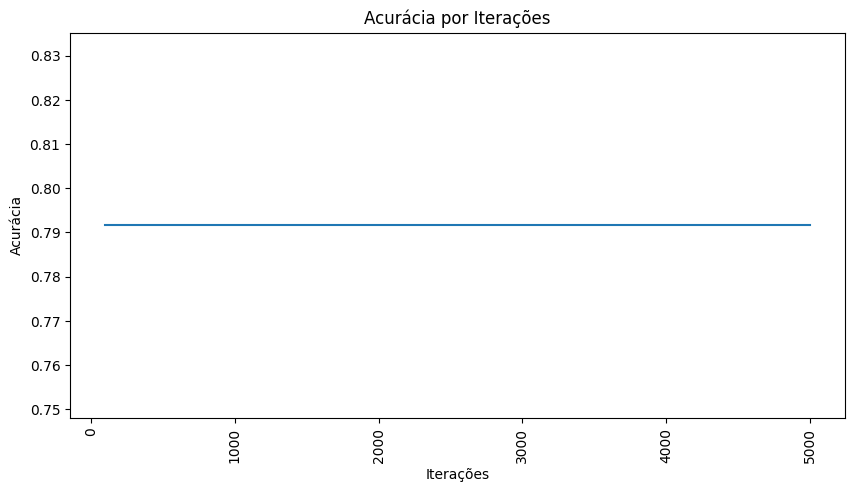

O número de iterações com a melhor acurácia é 100 com uma acurácia de 0.7916666666666666


In [ ]:
import matplotlib.pyplot as plt
df = hogs_pcas[0][2].copy() #pegando o primeiro dataframe para fazer o teste

y = df.classe  # Target variable
X = df.drop('classe', axis=1)  # Features

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=73)

from sklearn.neural_network import MLPClassifier

lista_camadas = [resultados[0][0]]
resultados = []
algoritimos = ['adam']
taxas = [0.01]
iteracoes = [100,500,1000,2500,5000]
for camadas in lista_camadas:
  for solver in algoritimos:
    for activation in funcoes_ativacao:
      for taxa in taxas:
        for max_iter in iteracoes:
          mlp = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=camadas,
                              random_state=73, learning_rate_init=taxa, learning_rate='adaptive', max_iter=max_iter)
          mlp.fit(X_train, y_train)

          # Predict the response for the test dataset
          y_pred = mlp.predict(X_test)
          acuracia = metrics.accuracy_score(y_test, y_pred)
          resultados.append((max_iter, acuracia))

# Ordena os resultados pelas iterações
resultados.sort(key=lambda x: x[1], reverse=True)

# Plota os resultados
max_iter = [str(r[0]) for r in resultados]
acuracias = [r[1] for r in resultados]

plt.figure(figsize=(10,5))
plt.plot(iteracoes, acuracias)
plt.xlabel('Iterações')
plt.ylabel('Acurácia')
plt.title('Acurácia por Iterações')
plt.xticks(rotation=90)
plt.show()

# Imprime o número de iterações com a melhor acurácia
print(f'O número de iterações com a melhor acurácia é {resultados[0][0]} com uma acurácia de {resultados[0][1]}')

### 2.3.4 Variando a taxa de aprendizagem

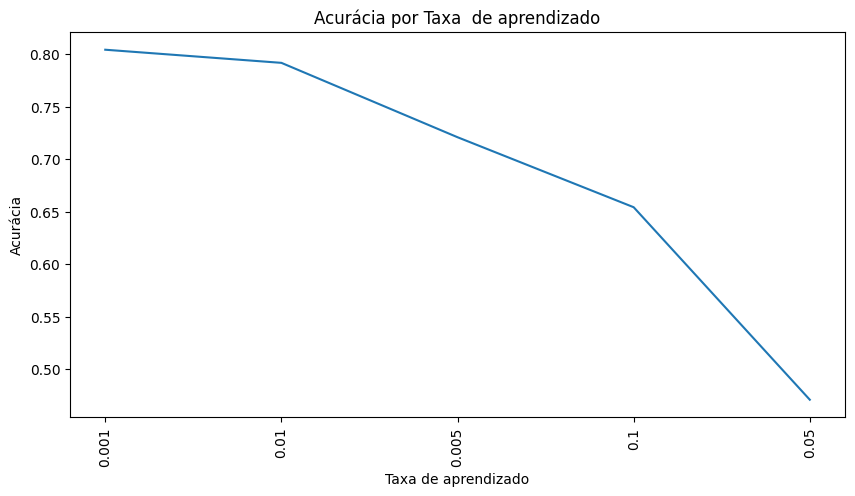

A taxa de aprendizado com a melhor acurácia é 0.001 com uma acurácia de 0.8041666666666667


In [ ]:
import matplotlib.pyplot as plt
df = hogs_pcas[0][2].copy() #pegando o primeiro dataframe para fazer o teste

y = df.classe  # Target variable
X = df.drop('classe', axis=1)  # Features

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=73)

from sklearn.neural_network import MLPClassifier

algoritimos = ['adam']
taxas = [0.100, 0.050, 0.010, 0.005, 0.001]
iteracoes = [resultados[0][0]]
resultados = []

for camadas in lista_camadas:
  for solver in algoritimos:
    for activation in funcoes_ativacao:
      for taxa in taxas:
        for max_iter in iteracoes:
          mlp = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=camadas,
                              random_state=73, learning_rate_init=taxa, learning_rate='adaptive', max_iter=max_iter)
          mlp.fit(X_train, y_train)

          # Predict the response for the test dataset
          y_pred = mlp.predict(X_test)
          acuracia = metrics.accuracy_score(y_test, y_pred)
          resultados.append((taxa, acuracia))

# Ordena os resultados pelas taxas de aprendizado
resultados.sort(key=lambda x: x[1], reverse=True)

# Plota os resultados
taxa = [str(r[0]) for r in resultados]
acuracias = [r[1] for r in resultados]

plt.figure(figsize=(10,5))
plt.plot(taxa, acuracias)
plt.xlabel('Taxa de aprendizado')
plt.ylabel('Acurácia')
plt.title('Acurácia por Taxa  de aprendizado')
plt.xticks(rotation=90)
plt.show()

# Imprime o número de taxa de aprendizado com a melhor acurácia
print(f'A taxa de aprendizado com a melhor acurácia é {resultados[0][0]} com uma acurácia de {resultados[0][1]}')

### 2.3.5 Variando o algoritmo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


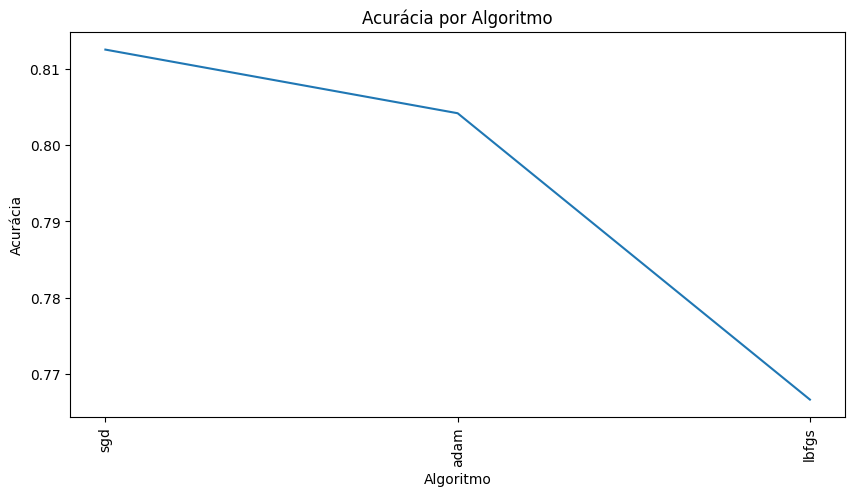

O Algoritmo com a melhor acurácia é sgd com uma acurácia de 0.8125


In [ ]:
import matplotlib.pyplot as plt
df = hogs_pcas[0][2].copy() #pegando o primeiro dataframe para fazer o teste

y = df.classe  # Target variable
X = df.drop('classe', axis=1)  # Features

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=73)

from sklearn.neural_network import MLPClassifier

algoritimos = ['lbfgs', 'sgd','adam']
taxas = [resultados[0][0]]
resultados = []

for camadas in lista_camadas:
  for solver in algoritimos:
    for activation in funcoes_ativacao:
      for taxa in taxas:
        for max_iter in iteracoes:
          mlp = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=camadas,
                              random_state=73, learning_rate_init=taxa, learning_rate='adaptive', max_iter=max_iter)
          mlp.fit(X_train, y_train)

          # Predict the response for the test dataset
          y_pred = mlp.predict(X_test)
          acuracia = metrics.accuracy_score(y_test, y_pred)
          resultados.append((solver, acuracia))

# Ordena os resultados pelos algoritmos
resultados.sort(key=lambda x: x[1], reverse=True)

# Plota os resultados
algoritmo = [str(r[0]) for r in resultados]
acuracias = [r[1] for r in resultados]

plt.figure(figsize=(10,5))
plt.plot(algoritmo, acuracias)
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia')
plt.title('Acurácia por Algoritmo')
plt.xticks(rotation=90)
plt.show()

# Imprime o número de taxa de aprendizado com a melhor acurácia
print(f'O Algoritmo com a melhor acurácia é {resultados[0][0]} com uma acurácia de {resultados[0][1]}')

### 2.3.6 Treinamento com diferentes bases de dados

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
lista_camadas = [(1795,1795,1795)]
funcoes_ativacao = ['relu']
algoritimos = ['sgd']
taxas = [0.001]
iteracoes = [100]

max_depth = ''
all_accuracies_MLP = [['max_depth', 'base', 'treinamento/teste', 'accuracy']]
max_accuracy_MLP = [0,0,0,0,'','']

mlp = MLPClassifier(activation=funcoes_ativacao[0],solver=algoritimos[0],hidden_layer_sizes=lista_camadas[0],
                    random_state=73, learning_rate_init=taxas[0], learning_rate='adaptive', max_iter=iteracoes[0])

for hogs_vetor in hogs_pcas:
  hog_size = hogs_vetor[0]
  porcent = hogs_vetor[1]
  data = hogs_vetor[2]
  print(f'hog size: {hog_size}')
  print(f'porcentagem do PCA: {porcent}')

  y = df.classe  # Target variable
  X = df.drop('classe', axis=1)  # Features

  all_accuracies_MLP, max_accuracy_MLP = treinamento(mlp, all_accuracies_MLP, max_accuracy_MLP)
  print()

hog size: 16
porcentagem do PCA: 0

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 16
porcentagem do PCA: 0.5

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 16
porcentagem do PCA: 0.75

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 16
porcentagem do PCA: 0.95

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 16
porcentagem do PCA: 1

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 20
porcentagem do PCA: 0

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 20
porcentagem do PCA: 0.5

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 20
porcentagem do PCA: 0.75

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 20
porcentagem do PCA: 0.95

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 20
porcentagem do PCA: 1

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 24
porcentagem do PCA: 0

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 24
porcentagem do PCA: 0.5

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 24
porcentagem do PCA: 0.75

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 24
porcentagem do PCA: 0.95

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hog size: 24
porcentagem do PCA: 1

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# 3. CNN

## 3.1 Aplicando CNN com max e avg

In [7]:
from google.colab import files
## Carregar as Libs necessarias
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
#pandas e numpy
import numpy as np
import pandas as pd
## Carregar e processar imagem
from skimage import io
from skimage.transform import resize
## Importando PCA do SkLearn
from sklearn.decomposition import PCA
import cv2
#Para evitar erros caso não seja RGB
from PIL import Image
import tempfile


def cnn_pca(model, list_files, cnn_size):
  cnn_features = []

  for filename in list_files:
    print(filename)
    img = imread('images_cats-dogs/'+filename)
    image_resized = resize(img, (128,128))
    ## Colocando a imagem no formato correto
    x = image.img_to_array(image_resized)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    ## Extração de características

    try:
      # Tentar extrair características
      features = model.predict(x)
    except Exception as e:
      # Tratar a exceção (converter a imagem para RGB)
      image_pil = Image.open('images_cats-dogs/'+filename)
      image_pil = image_pil.convert("RGB")
      # Salvar a imagem temporariamente
      temp_filename = tempfile.NamedTemporaryFile(suffix=".jpg", delete=False).name
      image_pil.save(temp_filename)
      imagem_rgb = io.imread(temp_filename)
      #retornando agora com a imagem rgb
      image_resized_rgb = resize(imagem_rgb, (128, 128))
      x = image.img_to_array(image_resized_rgb)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)
      features = model.predict(x)

    ## Tornar as caracteristicas em forma de vetor
    features_flatten = features.flatten()

    cnn_features.append(features_flatten)

  ## Adicionar as colunas com os valores do cnn para cada um
  data = {"pathfile": list_files, "cnn_features": cnn_features}
  df = pd.DataFrame(data)
  df['classe'] = df['pathfile'].str.split('_').str[0].apply(classify_animal)
  df = df.drop('pathfile', axis=1)

  # transformando cada valor do cnn_feature em um atributo (coluna)
  df2 = pd.DataFrame(df['cnn_features'].tolist())
  df2.columns = df2.columns.map(lambda x: f'cnn_feature_{x+1}')
  df = pd.concat([df.drop('cnn_features', axis=1), df2], axis=1)

  # Salvando transformado
  df.to_csv(f'CNN_{cnn_size}.csv', index=False)

  # Importando arquivo transformado
  files.download(f'CNN_{cnn_size}.csv')
  return [cnn_size, df]

lista_cnn = []
## Carregar o modelo de CNN pre-treinado e aplicar
model = VGG16(weights='imagenet', include_top=False, pooling='max')
lista_cnn.append(cnn_pca(model, uploaded_images, 'VGG16_max'))

model = VGG16(weights='imagenet', include_top=False, pooling='avg')
lista_cnn.append(cnn_pca(model, uploaded_images, 'VGG16_avg'))

58889256/58889256 [==============================] - 0s 0us/step
leonberger_72.jpg
1/1 [==============================] - 0s 389ms/step
Persian_29.jpg
1/1 [==============================] - 0s 147ms/step
wheaten_terrier_82.jpg
1/1 [==============================] - 0s 139ms/step
wheaten_terrier_104.jpg
1/1 [==============================] - 0s 138ms/step
Abyssinian_226.jpg
1/1 [==============================] - 0s 130ms/step
leonberger_186.jpg
1/1 [==============================] - 0s 140ms/step
leonberger_22.jpg
1/1 [==============================] - 0s 132ms/step
leonberger_144.jpg
1/1 [==============================] - 0s 133ms/step
leonberger_184.jpg
1/1 [==============================] - 0s 136ms/step
wheaten_terrier_92.jpg
1/1 [==============================] - 0s 135ms/step
leonberger_189.jpg
1/1 [==============================] - 0s 144ms/step
wheaten_terrier_55.jpg
1/1 [==============================] - 0s 134ms/step
Abyssinian_191.jpg
1/1 [==============================] - 0s

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

leonberger_72.jpg
1/1 [==============================] - 0s 237ms/step
Persian_29.jpg
1/1 [==============================] - 0s 130ms/step
wheaten_terrier_82.jpg
1/1 [==============================] - 0s 135ms/step
wheaten_terrier_104.jpg
1/1 [==============================] - 0s 141ms/step
Abyssinian_226.jpg
1/1 [==============================] - 0s 132ms/step
leonberger_186.jpg
1/1 [==============================] - 0s 146ms/step
leonberger_22.jpg
1/1 [==============================] - 0s 136ms/step
leonberger_144.jpg
1/1 [==============================] - 0s 191ms/step
leonberger_184.jpg
1/1 [==============================] - 0s 194ms/step
wheaten_terrier_92.jpg
1/1 [==============================] - 0s 186ms/step
leonberger_189.jpg
1/1 [==============================] - 0s 185ms/step
wheaten_terrier_55.jpg
1/1 [==============================] - 0s 184ms/step
Abyssinian_191.jpg
1/1 [==============================] - 0s 194ms/step
wheaten_terrier_50.jpg
1/1 [=========================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3.2 Treinamento

In [8]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def treinamento_cnn(algoritmo, all_accuracies, max_accuracy):
  '''for n_splits in [5,10,15,20]:
    kf = KFold(n_splits=n_splits, random_state=73, shuffle=True)
    scores = cross_val_score(algoritmo, X, y, scoring='accuracy', cv=kf)
    accuracy = mean(scores)
    y_pred = cross_val_predict(algoritmo, X, y, cv=kf)
    all_accuracies.append([max_depth, cnn_size, f'cv_n_splits_{n_splits}' , round(accuracy,3)])
    if accuracy > max_accuracy[3]:
      max_accuracy = [max_depth, cnn_size, f'cv_n_splits_{n_splits}', round(accuracy,3), y, y_pred]
'''
  for size in [10,20,30]:
    test_size = size/100
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=73)
    algoritmo.fit(X_train, y_train)
    # Predict the response for the test dataset
    y_pred = algoritmo.predict(X_test)
    # Model Accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    # Adicionar a acurácia à lista geral
    all_accuracies.append([max_depth, cnn_size, f'{100-size}/{size}' , round(accuracy,3)])
    if accuracy > max_accuracy[3]:
      max_accuracy = [max_depth, cnn_size , f'{100-size}/{size}', round(accuracy,3), y_test, y_pred]
  return all_accuracies, max_accuracy

In [9]:
max_depth = ''
for cnn_vetor in lista_cnn:
  cnn_size = cnn_vetor[0]
  data = cnn_vetor[1]
  print(f'cnn size: {cnn_size}')
  print()

  y = data.classe  # Target variable
  X = data.copy().drop('classe', axis=1)  # Features

  mlp = MLPClassifier(activation=funcoes_ativacao[0],solver=algoritimos[0],hidden_layer_sizes=lista_camadas[0],
                      random_state=73, learning_rate_init=taxas[0], learning_rate='adaptive', max_iter=iteracoes[0])
  all_accuracies_MLP, max_accuracy_MLP = treinamento(mlp, all_accuracies_MLP, max_accuracy_MLP)


cnn size: 24

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20
divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


cnn size: 24

divisão 90/10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 80/20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


divisão 70/30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: ignored

In [11]:
all_accuracies_MLP

[['max_depth', 'base', 'treinamento/teste', 'accuracy'],
 ['', 'HOG (16x16)', '90/10', 0.688],
 ['', 'HOG (16x16) e PCA de 0', '90/10', 0.688],
 ['', 'HOG (16x16)', '80/20', 0.681],
 ['', 'HOG (16x16) e PCA de 0', '80/20', 0.681],
 ['', 'HOG (16x16)', '70/30', 0.742],
 ['', 'HOG (16x16) e PCA de 0', '70/30', 0.742],
 ['', 'HOG (16x16) e PCA de 0.5', '90/10', 0.688],
 ['', 'HOG (16x16) e PCA de 0.5', '80/20', 0.681],
 ['', 'HOG (16x16) e PCA de 0.5', '70/30', 0.742],
 ['', 'HOG (16x16) e PCA de 0.75', '90/10', 0.688],
 ['', 'HOG (16x16) e PCA de 0.75', '80/20', 0.681],
 ['', 'HOG (16x16) e PCA de 0.75', '70/30', 0.742],
 ['', 'HOG (16x16) e PCA de 0.95', '90/10', 0.688],
 ['', 'HOG (16x16) e PCA de 0.95', '80/20', 0.681],
 ['', 'HOG (16x16) e PCA de 0.95', '70/30', 0.742],
 ['', 'HOG (16x16) e PCA de 1', '90/10', 0.688],
 ['', 'HOG (16x16) e PCA de 1', '80/20', 0.681],
 ['', 'HOG (16x16) e PCA de 1', '70/30', 0.742],
 ['', 'HOG (20x20)', '90/10', 0.688],
 ['', 'HOG (20x20) e PCA de 0', 

In [14]:
data_accuracies = data_accuracies_MLP.copy()

In [21]:
data_accuracies_MLP = pd.DataFrame(all_accuracies_MLP[1:], columns=all_accuracies_MLP[0])
matrix_MLP = data_accuracies_MLP.pivot_table(index=['base', 'treinamento/teste'],
                                             columns='max_depth', values='accuracy', aggfunc='first')

In [22]:
# Exibir a matriz
print(matrix_MLP.to_string(index=True, header=True))
# Calcular a média de todas as colunas
medias = matrix_MLP.mean()
print()
print('Médias de todas as colunas:')
print(medias)
# Calcular o desvio padrão de todas as colunas
desvios_padrao = matrix_MLP.std()
print()
print('Desvios padrão de todas as colunas:')
print(desvios_padrao)
print()
print('------- MELHOR RESULTADO --------')
print(f'{max_accuracy_MLP[1]} e divisão de {max_accuracy_MLP[2]}')
print(f'accuracy: {max_accuracy_MLP[3]}')

max_depth                                         
base                      treinamento/teste       
HOG (16x16)               70/30              0.742
                          80/20              0.681
                          90/10              0.688
HOG (16x16) e PCA de 0    70/30              0.742
                          80/20              0.681
                          90/10              0.688
HOG (16x16) e PCA de 0.5  70/30              0.742
                          80/20              0.681
                          90/10              0.688
HOG (16x16) e PCA de 0.75 70/30              0.742
                          80/20              0.681
                          90/10              0.688
HOG (16x16) e PCA de 0.95 70/30              0.742
                          80/20              0.681
                          90/10              0.688
HOG (16x16) e PCA de 1    70/30              0.742
                          80/20              0.681
                          90/10

In [23]:
  # Salvando
matrix_MLP.to_csv(f'Matriz_MLP.csv', index=False)

# Importando arquivo
from google.colab import files
files.download('Matriz_MLP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
matrix_MLP.to_excel(f'Matriz_MLP.xlsx', index=False)
files.download('Matriz_MLP.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>